<a href="https://colab.research.google.com/github/ibudeX/Weather-Forecasting/blob/main/Weather_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kalusamuel/lagos-weather-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/lagos-weather-dataset


In [ ]:
os.listdir(path)


['lagos_all_years.csv']

In [ ]:
data=pd.read_csv(path+'/lagos_all_years.csv')

data

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,windspeedmax,windspeedmin
0,2002-01-01,28.6,25.6,27.2,33.8,25.6,30.7,25.2,88.7,0.0,...,NaN,2002-01-01T06:57:21,2002-01-01T18:42:38,0.57,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
1,2002-01-02,33.1,26.1,29.0,39.4,26.1,33.8,25.1,80.5,0.0,...,NaN,2002-01-02T06:57:46,2002-01-02T18:43:08,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN
2,2002-01-03,34.1,25.1,29.1,35.2,25.1,31.7,23.2,74.6,0.0,...,NaN,2002-01-03T06:58:11,2002-01-03T18:43:39,0.64,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN
3,2002-01-04,33.1,33.1,33.1,39.4,39.4,39.4,24.1,59.3,0.0,...,NaN,2002-01-04T06:58:35,2002-01-04T18:44:10,0.68,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
4,2002-01-05,31.1,25.6,28.3,37.4,25.6,33.1,25.4,85.0,0.0,...,NaN,2002-01-05T06:58:59,2002-01-05T18:44:40,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8671,2024-06-29,31.0,23.9,27.1,37.7,23.9,30.2,24.7,87.1,12.0,...,30.0,2024-06-29T06:35:20,2024-06-29T19:04:51,0.77,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"DNMM,remote,65201099999,VRJT5",NaN,NaN
8672,2024-06-30,31.2,25.0,27.8,39.5,25.0,31.8,25.2,86.2,3.0,...,30.0,2024-06-30T06:35:33,2024-06-30T19:05:01,0.80,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"DNMM,65201099999",NaN,NaN
8673,2024-07-01,32.0,25.0,27.9,40.5,25.0,31.5,24.9,84.6,6.9,...,30.0,2024-07-01T06:35:47,2024-07-01T19:05:10,0.84,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"DNMM,remote",NaN,NaN
8674,2024-07-02,30.0,24.0,26.9,37.2,24.0,29.3,24.3,85.9,13.6,...,30.0,2024-07-02T06:36:01,2024-07-02T19:05:19,0.87,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"DNMM,remote,VRJT5",NaN,NaN


In [ ]:
data.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'windspeedmax', 'windspeedmin'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8676 entries, 0 to 8675
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          7125 non-null   object 
 1   tempmax           8085 non-null   float64
 2   tempmin           8085 non-null   float64
 3   temp              7853 non-null   float64
 4   feelslikemax      8085 non-null   float64
 5   feelslikemin      8085 non-null   float64
 6   feelslike         7853 non-null   float64
 7   dew               7853 non-null   float64
 8   humidity          7853 non-null   float64
 9   precip            7853 non-null   float64
 10  precipprob        7853 non-null   float64
 11  precipcover       8676 non-null   float64
 12  preciptype        3736 non-null   object 
 13  snow              3928 non-null   float64
 14  snowdepth         3923 non-null   float64
 15  windgust          5876 non-null   float64
 16  windspeed         8078 non-null   float64


In [ ]:
#drop incomplete columns
data1=data.copy()


# Dropping columns with a high number of missing values
columns_to_drop = ['severerisk', 'windspeedmax', 'windspeedmin', 'description', 'icon', 'stations','snow', 'snowdepth', 'windgust','solarradiation', 'solarenergy', 'uvindex']
data1 = data1.drop(columns=columns_to_drop)

In [ ]:
# Display the updated columns
display(data1.columns)

data1.info()

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'sunrise', 'sunset', 'moonphase',
       'conditions'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8676 entries, 0 to 8675
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          7125 non-null   object 
 1   tempmax           8085 non-null   float64
 2   tempmin           8085 non-null   float64
 3   temp              7853 non-null   float64
 4   feelslikemax      8085 non-null   float64
 5   feelslikemin      8085 non-null   float64
 6   feelslike         7853 non-null   float64
 7   dew               7853 non-null   float64
 8   humidity          7853 non-null   float64
 9   precip            7853 non-null   float64
 10  precipprob        7853 non-null   float64
 11  precipcover       8676 non-null   float64
 12  preciptype        3736 non-null   object 
 13  windspeed         8078 non-null   float64
 14  winddir           7470 non-null   float64
 15  sealevelpressure  7664 non-null   float64
 16  cloudcover        7853 non-null   float64


In [ ]:
for col in data1.columns:
    print(f"Unique value counts for column: {col}")
    display(data1[col].value_counts())
    print("\n" + "="*50 + "\n") # Separator for clarity

Unique value counts for column: datetime


,count
datetime,
2024-07-03,1
2002-01-01,1
2002-01-02,1
2002-01-03,1
2002-01-04,1
...,...
2002-01-10,1
2002-01-09,1
2002-01-08,1




Unique value counts for column: tempmax


,count
tempmax,
34.0,573
33.0,530
32.0,447
31.0,411
30.0,407
...,...
36.2,1
38.6,1
37.2,1




Unique value counts for column: tempmin


,count
tempmin,
24.0,925
25.0,749
23.0,588
24.1,433
26.0,361
...,...
13.5,1
21.3,1
14.9,1




Unique value counts for column: temp


,count
temp,
26.4,192
26.5,178
27.3,176
27.2,175
28.7,173
...,...
32.5,1
23.1,1
22.7,1




Unique value counts for column: feelslikemax


,count
feelslikemax,
40.6,452
0.0,232
42.1,204
39.3,191
42.0,176
...,...
47.8,1
54.0,1
45.0,1




Unique value counts for column: feelslikemin


,count
feelslikemin,
24.0,925
25.0,749
23.0,588
24.1,433
26.0,361
...,...
13.5,1
21.3,1
14.9,1




Unique value counts for column: feelslike


,count
feelslike,
31.5,93
26.3,91
31.7,90
27.9,90
28.5,89
...,...
23.1,1
39.5,1
22.6,1




Unique value counts for column: dew


,count
dew,
25.1,292
24.8,277
24.1,271
24.0,270
24.4,264
...,...
16.3,1
14.8,1
13.6,1




Unique value counts for column: humidity


,count
humidity,
84.5,79
85.6,78
82.3,78
84.4,78
84.3,76
...,...
59.0,1
98.3,1
70.3,1




Unique value counts for column: precip


,count
precip,
0.0,4454
0.1,296
1.0,188
2.0,185
0.2,169
...,...
28.7,1
221.0,1
55.0,1




Unique value counts for column: precipprob


,count
precipprob,
0.0,4454
100.0,3399




Unique value counts for column: precipcover


,count
precipcover,
0.00,5277
4.17,1946
8.33,615
12.50,206
16.67,104
20.83,77
25.00,67
29.17,52
37.50,45




Unique value counts for column: preciptype


,count
preciptype,
rain,3736




Unique value counts for column: windspeed


,count
windspeed,
18.4,722
0.0,608
22.3,598
14.8,520
16.6,516
...,...
46.3,1
75.6,1
28.2,1




Unique value counts for column: winddir


,count
winddir,
240.0,34
220.0,28
210.0,25
250.0,24
228.4,24
...,...
186.8,1
296.6,1
53.3,1




Unique value counts for column: sealevelpressure


,count
sealevelpressure,
1011.9,197
1011.6,174
1012.0,172
1011.2,170
1011.4,169
...,...
1006.1,1
1005.9,1
1006.2,1




Unique value counts for column: cloudcover


,count
cloudcover,
90.0,1033
53.3,39
61.3,37
56.8,34
56.3,34
...,...
83.2,1
33.5,1
23.7,1




Unique value counts for column: visibility


,count
visibility,
10.0,452
9.8,330
9.3,258
9.9,250
9.5,247
...,...
0.1,1
31.3,1
18.5,1




Unique value counts for column: sunrise


,count
sunrise,
2023-08-16T06:41:00,2
2023-08-17T06:40:57,2
2023-08-18T06:40:54,2
2023-08-19T06:40:50,2
2023-08-20T06:40:45,2
...,...
2009-02-24T07:00:31,1
2009-02-23T07:00:50,1
2009-02-22T07:01:08,1




Unique value counts for column: sunset


,count
sunset,
2023-08-16T19:00:35,2
2023-08-17T19:00:13,2
2023-08-18T18:59:51,2
2023-08-19T18:59:28,2
2023-08-20T18:59:04,2
...,...
2009-02-24T18:58:49,1
2009-02-23T18:58:48,1
2009-02-22T18:58:46,1




Unique value counts for column: moonphase


,count
moonphase,
0.75,326
0.25,315
0.50,281
0.00,281
0.07,103
...,...
0.73,41
0.76,37
0.24,36




Unique value counts for column: conditions


,count
conditions,
Partially cloudy,4108
"Rain, Partially cloudy",3217
Clear,77
"Rain, Overcast",74
Overcast,19
Rain,2


In [ ]:
data1['preciptype'] = data1['preciptype'].fillna('No rain')

# Display unique value counts for 'preciptype' to verify the change
display(data1['preciptype'].value_counts())

,count
preciptype,
No rain,4940
rain,3736


In [ ]:
data1['datetime'] = pd.to_datetime(data1['datetime'])
data1['sunrise'] = pd.to_datetime(data1['sunrise'])
data1['sunset'] = pd.to_datetime(data1['sunset'])

# Display the info to show the updated data types
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8676 entries, 0 to 8675
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          7125 non-null   datetime64[ns]
 1   tempmax           8085 non-null   float64       
 2   tempmin           8085 non-null   float64       
 3   temp              7853 non-null   float64       
 4   feelslikemax      8085 non-null   float64       
 5   feelslikemin      8085 non-null   float64       
 6   feelslike         7853 non-null   float64       
 7   dew               7853 non-null   float64       
 8   humidity          7853 non-null   float64       
 9   precip            7853 non-null   float64       
 10  precipprob        7853 non-null   float64       
 11  precipcover       8676 non-null   float64       
 12  preciptype        8676 non-null   object        
 13  windspeed         8078 non-null   float64       
 14  winddir           7470 n

In [ ]:
data2=data1.copy()

data2=data2.dropna()

data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5639 entries, 0 to 8675
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          5639 non-null   datetime64[ns]
 1   tempmax           5639 non-null   float64       
 2   tempmin           5639 non-null   float64       
 3   temp              5639 non-null   float64       
 4   feelslikemax      5639 non-null   float64       
 5   feelslikemin      5639 non-null   float64       
 6   feelslike         5639 non-null   float64       
 7   dew               5639 non-null   float64       
 8   humidity          5639 non-null   float64       
 9   precip            5639 non-null   float64       
 10  precipprob        5639 non-null   float64       
 11  precipcover       5639 non-null   float64       
 12  preciptype        5639 non-null   object        
 13  windspeed         5639 non-null   float64       
 14  winddir           5639 non-nu

In [ ]:
# Map 'preciptype'
preciptype_mapping = {'No rain': 0, 'rain': 1}
data1['preciptype'] = data1['preciptype'].map(preciptype_mapping)

# Map 'conditions'
conditions_mapping = {
    'Partially cloudy': 0,
    'Rain, Partially cloudy': 1,
    'Clear': 2,
    'Rain, Overcast': 3,
    'Overcast': 4,
    'Rain': 5
}
data1['conditions'] = data1['conditions'].map(conditions_mapping)

# Display unique values and their counts for verification
print("Unique values and counts for 'preciptype' after mapping:")
display(data1['preciptype'].value_counts())

print("\nUnique values and counts for 'conditions' after mapping:")
display(data1['conditions'].value_counts())

Unique values and counts for 'preciptype' after mapping:


,count
preciptype,
0,4940
1,3736



Unique values and counts for 'conditions' after mapping:


,count
conditions,
0.0,4108
1.0,3217
2.0,77
3.0,74
4.0,19
5.0,2


'Partially cloudy' (0): The sky is partly covered by clouds, but there is still a significant amount of sunshine.
'Rain, Partially cloudy' (1): There is a combination of rain and partial cloud cover. This could mean intermittent rain with periods of partial clouds.
'Clear' (2): The sky is mostly or entirely free of clouds, typically resulting in sunshine during the day and visible stars at night.
'Rain, Overcast' (3): It is raining, and the sky is completely or heavily covered by clouds.
'Overcast' (4): The sky is completely covered by clouds, with no sunshine visible. There might not be rain at the moment, but it often indicates a higher probability of precipitation.
'Rain' (5): It is raining. This description is less specific about cloud cover but indicates precipitation is occurring.

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8676 entries, 0 to 8675
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          7125 non-null   datetime64[ns]
 1   tempmax           8085 non-null   float64       
 2   tempmin           8085 non-null   float64       
 3   temp              7853 non-null   float64       
 4   feelslikemax      8085 non-null   float64       
 5   feelslikemin      8085 non-null   float64       
 6   feelslike         7853 non-null   float64       
 7   dew               7853 non-null   float64       
 8   humidity          7853 non-null   float64       
 9   precip            7853 non-null   float64       
 10  precipprob        7853 non-null   float64       
 11  precipcover       8676 non-null   float64       
 12  preciptype        8676 non-null   int64         
 13  windspeed         8078 non-null   float64       
 14  winddir           7470 n

In [ ]:
data1=data1.dropna()

data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5639 entries, 0 to 8675
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          5639 non-null   datetime64[ns]
 1   tempmax           5639 non-null   float64       
 2   tempmin           5639 non-null   float64       
 3   temp              5639 non-null   float64       
 4   feelslikemax      5639 non-null   float64       
 5   feelslikemin      5639 non-null   float64       
 6   feelslike         5639 non-null   float64       
 7   dew               5639 non-null   float64       
 8   humidity          5639 non-null   float64       
 9   precip            5639 non-null   float64       
 10  precipprob        5639 non-null   float64       
 11  precipcover       5639 non-null   float64       
 12  preciptype        5639 non-null   int64         
 13  windspeed         5639 non-null   float64       
 14  winddir           5639 non-nu

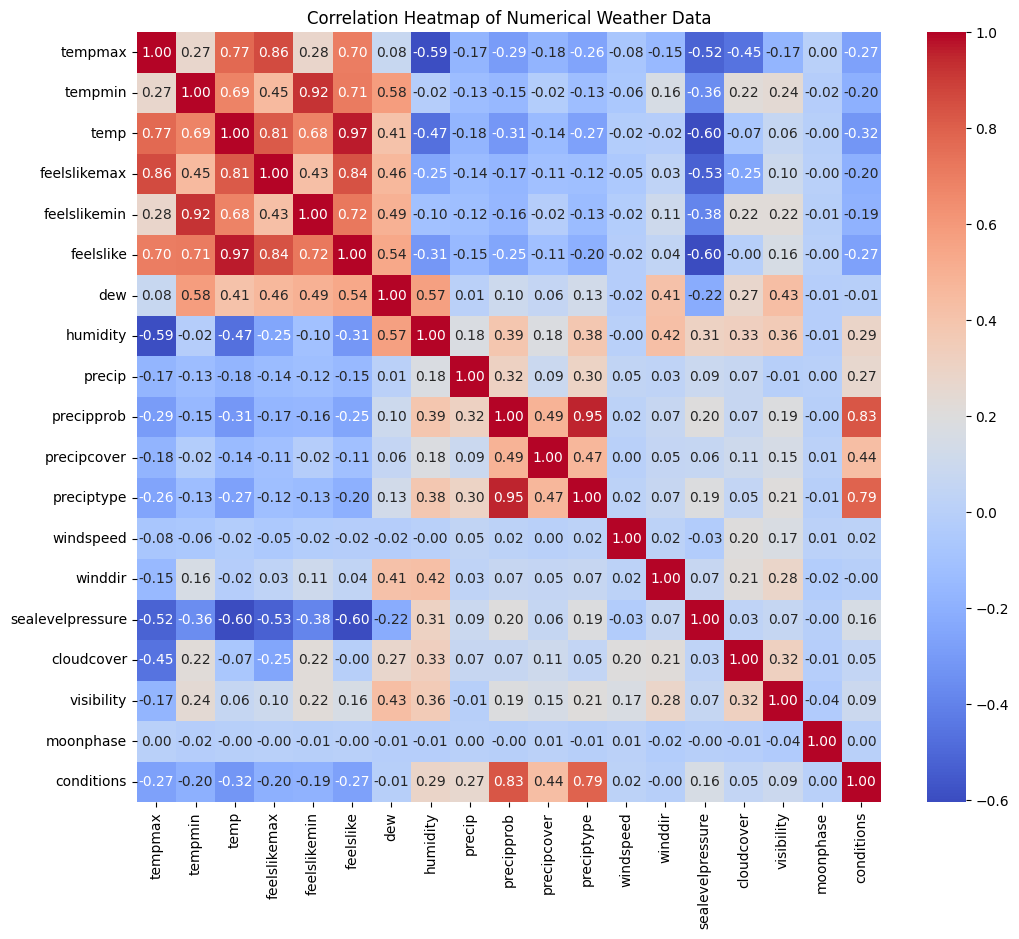

In [ ]:
# Select only numerical columns for correlation analysis
numerical_data1 = data1.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_data1.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Weather Data')
plt.show()